In [26]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'


### Three data sets in this project will utilize Linear SVM, Decision tree and KNN models.

## SVM helper functions

In [27]:

def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [28]:
def simple_cross_validation_svm(X_train_val, Y_train_val, C, gamma, fold):
    """
    A simple cross-validation function.
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C:           Parameter C for SVM.
    gamma:       Parameter gamma for SVM.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    number = len(Y_train_val)//fold
    for i in range(fold):
        X_test = X_train_val[i*number:(i+1)*number,:]
        Y_test = Y_train_val[i*number:(i+1)*number]
        X_train = np.delete(X_train_val, slice(i*number,(i+1)*number),axis = 0)
        Y_train = np.delete(Y_train_val, slice(i*number,(i+1)*number),axis = 0)
        newSVM = svm.SVC(kernel = 'linear', C=C)
        newSVM.fit(X_train,Y_train)
        train_acc = newSVM.score(X_train,Y_train)
        val_acc = newSVM.score(X_test,Y_test)
        val_acc_list.append(val_acc)
        train_acc_list.append(train_acc)
        
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [29]:
# 2) Implement the grid search function. 
def simple_GridSearchCV_fit_svm(X_train_val, Y_train_val, C_list, gamma_list, fold):
    """
    A simple grid search function for C and gamma with cross-validation. 
    We assume the SVM with the RBF kernel.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    C_list:      The list of C values to try.
    gamma_list:  The list of gamma values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of C and gamma are
    included in the matrix. Shape: (len(C_list), len(gamma_list))
    """
    val_acc_matrix   = np.zeros((len(C_list),1))
    train_acc_matrix = np.zeros((len(C_list),1))
    for i in range(len(C_list)):
        for j in range(len(gamma_list)):
            val_acc_matrix[i], train_acc_matrix[i]= simple_cross_validation_svm(\
            X_train_val, Y_train_val, C_list[i],gamma_list[j],fold)
    return val_acc_matrix, train_acc_matrix

## Decision Tree Helper

In [30]:
def draw_heatmap_linear(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    

## KNN Helper functions

In [31]:
class simple_KNeighborsClassifier(object):
    def __init__(self, k):
        """
        k-NN initialization.
            k: Number of nearest neighbors.
        """
        self.k = k
        
    def fit(self, X_train, Y_train):
        """
        k-NN fitting function.
            X_train: Feature vectors in training set.
            Y_train: Labels in training set.
        """
        self.X_train = X_train
        self.Y_train = Y_train
    def predictOne(self, test):
        distances = sorted((self.distance(x, test), y) for x, y in zip(self.X_train, self.Y_train))
        neighbors = distances[:self.k]
        weights = self.weights(neighbors)
        for a,b in weights:
            return b
    def weights(self, distances):
        matches = [(1, y) for d, y in distances if d == 0]
        return matches if matches else [(1/d, y) for d, y in distances]
    
    def distance(self, data1, data2): # euclidean
        return np.sqrt(sum((data1 - data2)**2))
    
    def predict(self, X_pred):
        """
        k-NN prediction function.
            X_pred: Feature vectors in training set.
        Return the predicted labels for X_pred. Shape: (len(X_pred), )
        """
        Y_pred = []
        
        #######FILL IN HERE #########
        for i in X_pred:
            Y_pred.append(self.predictOne(i))
        return np.array(Y_pred)

In [32]:
from sklearn.metrics import accuracy_score
def simple_cross_validation_knn(X_train_val, Y_train_val, k, fold):
    """
    A simple cross-validation function for k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k:           Parameter k for k-NN.
    fold:        The number of folds to do the cross-validation.
    
    Return the average accuracy on validation set.
    """
    val_acc_list = []
    train_acc_list = []
    number = len(Y_train_val)//fold
    for i in range(fold):
        #######FILL IN HERE #########
        X_test = X_train_val[i*number:(i+1)*number,:]
        Y_test = Y_train_val[i*number:(i+1)*number]
        X_train = np.delete(X_train_val, slice(i*number,(i+1)*number),axis = 0)
        Y_train = np.delete(Y_train_val, slice(i*number,(i+1)*number),axis = 0)
        newSVM = simple_KNeighborsClassifier(k)
        newSVM.fit(X_train,Y_train)
        train_arr = newSVM.predict(X_train)
        val_arr = newSVM.predict(X_test)
        train =(accuracy_score(Y_train, train_arr))
        val = (accuracy_score(Y_test, val_arr))
        val_acc_list.append(val)
        train_acc_list.append(train)
    return sum(val_acc_list) / len(val_acc_list), \
           sum(train_acc_list) / len(train_acc_list)

In [33]:
def simple_GridSearchCV_fit_knn(X_train_val, Y_train_val, k_list, fold):
    """
    A simple grid search function for k with cross-validation in k-NN.
    
    X_train_val: Features for train and val set. 
                 Shape: (num of data points, num of features)
    Y_train_val: Labels for train and val set.
                 Shape: (num of data points,)
    k_list:      The list of k values to try.
    fold:        The number of folds to do the cross-validation.
    
    Return the val and train accuracy matrix of cross-validation. 
    All combinations of k are included in the array. 
    Shape: (len(k_list), )
    """
    val_acc_array = np.zeros(len(k_list))
    train_acc_array = np.zeros(len(k_list))
    for i in range(len(k_list)):
        val_acc_array[i], train_acc_array[i] = simple_cross_validation_knn(
            X_train_val, Y_train_val, k_list[i], fold)
    return val_acc_array, train_acc_array

In [34]:

def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## Dataset 1:  Zoo

## 1.1 Using Linear SVM

In [10]:
ds1 = pd.read_csv('zoo.data',header = None,
                  names=['animal-name','hair','feathers',
                        'eggs','milk','airborne','aquatic',
                        'predator','toothed','backbone',
                        'breathes','venomous','fines',
                        'legs','tail','domestic','catsize',
                        'type'])
ds1.head()

,animal-name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fines,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
ds1.dropna(inplace=True)
ds1.shape

(101, 18)

In [12]:
X = ds1[['hair','feathers',
                        'eggs','milk','airborne','aquatic',
                       'toothed','backbone',
                        'breathes','venomous','fines',
                        'legs','tail','domestic','catsize',
                        'type']]
Y = ds1['predator']

In [13]:
X_train_val = X.iloc[:int(0.8*len(X))]
X_test      = X.iloc[int(0.8*len(X)):]   
Y_train_val = Y.iloc[:int(0.8*len(Y))]
Y_test      = Y.iloc[int(0.8*len(Y)):]

X_train_val2 = X.iloc[:int(0.5*len(X))]
X_test2      = X.iloc[int(0.5*len(X)):]   
Y_train_val2 = Y.iloc[:int(0.5*len(Y))]
Y_test2      = Y.iloc[int(0.5*len(Y)):]

X_train_val3 = X.iloc[:int(0.2*len(X))]
X_test3    = X.iloc[int(0.2*len(X)):]   
Y_train_val3 = Y.iloc[:int(0.2*len(Y))]
Y_test3      = Y.iloc[int(0.2*len(Y)):]

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
print(X_train_val2.shape, X_test2.shape, Y_train_val2.shape, Y_test2.shape)
print(X_train_val3.shape, X_test3.shape, Y_train_val3.shape, Y_test3.shape)

(80, 16) (21, 16) (80,) (21,)
(50, 16) (51, 16) (50,) (51,)
(20, 16) (81, 16) (20,) (81,)


Case 20/80:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change fro

Training accuracy is: [0.67839506]
Validation accuracy is: [0.62435897]
Test accuracy is: 0.47619047619047616
Best accuracy in total is: [0.67839506]


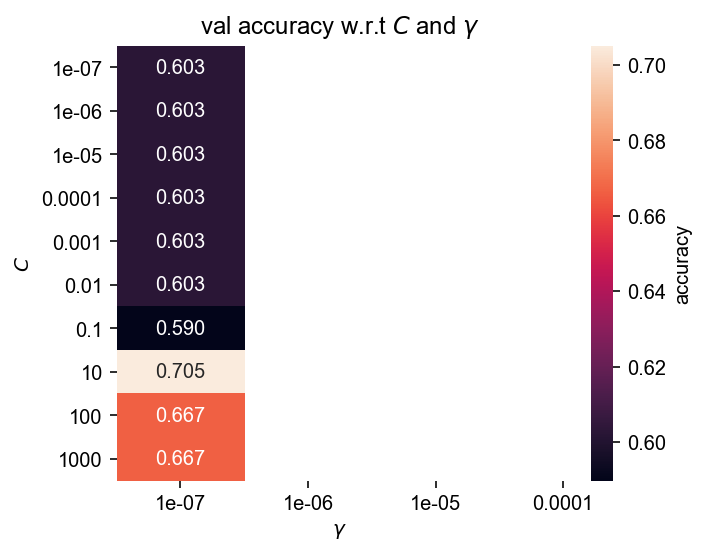

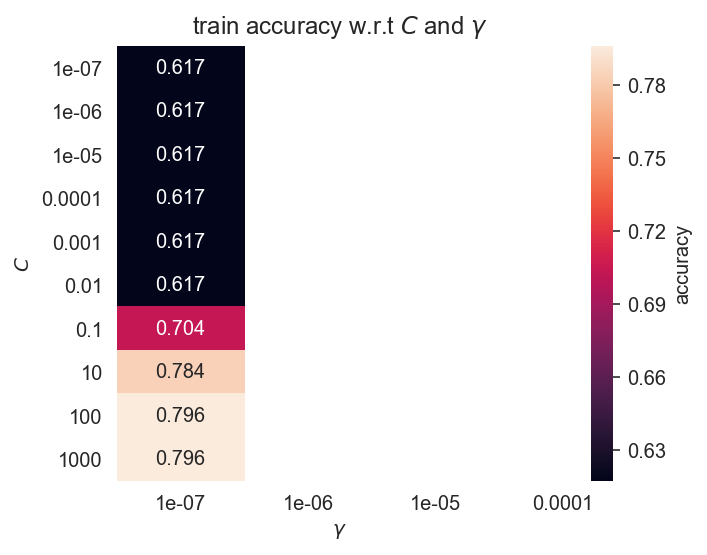

Case 50/50:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change fro

Training accuracy is: [0.65784314]
Validation accuracy is: [0.50833333]
Test accuracy is: 0.5686274509803921
Best accuracy in total is: [0.65784314]


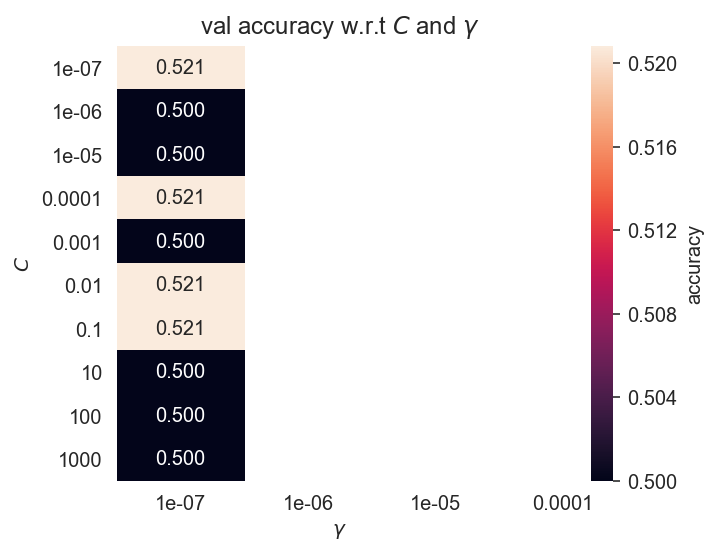

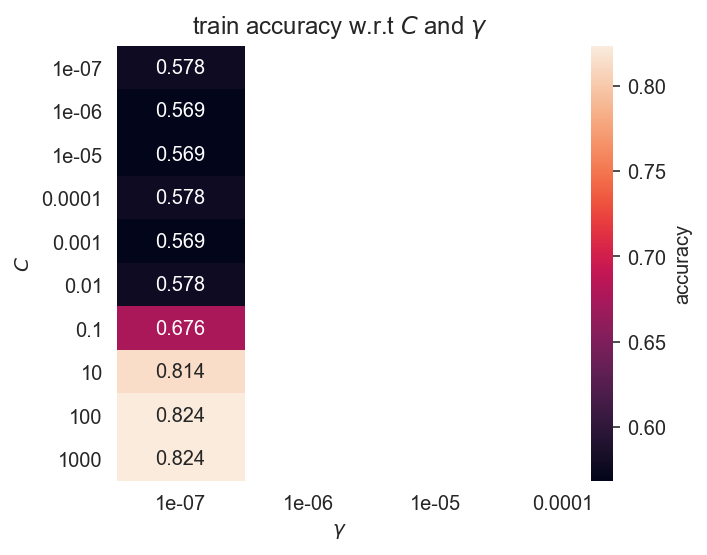

Case 80/20:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change fro

Training accuracy is: [0.75238095]
Validation accuracy is: [0.59444444]
Test accuracy is: 0.5308641975308642
Best accuracy in total is: [0.75238095]


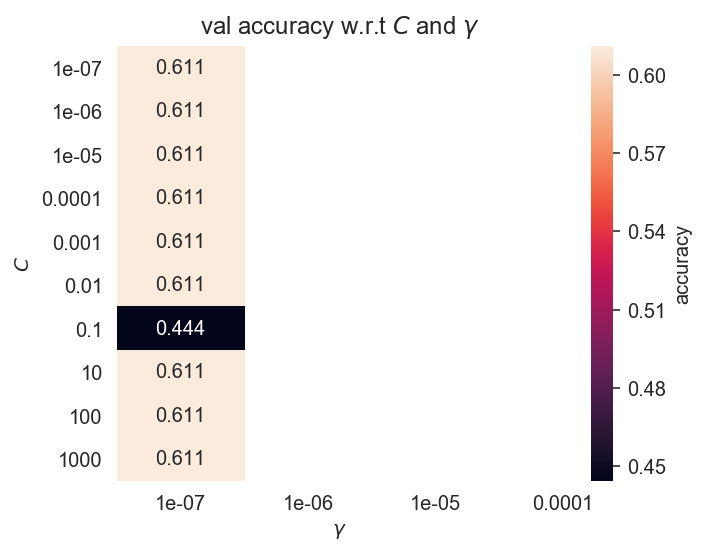

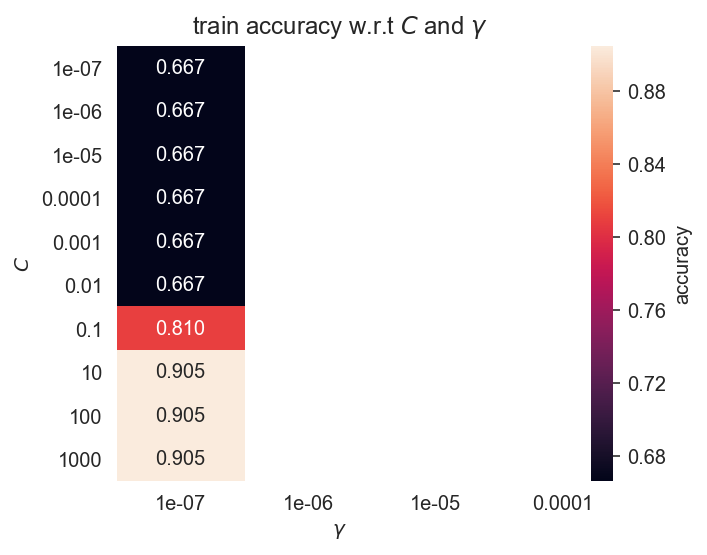

In [14]:
classifier = svm.SVC(kernel = 'rbf')
C_list  = [10**(-7),10**(-6), 10**-5,10**-4,10**-3, 10**-2,10**-1,10,100,1000] # Different C to tr
gamma_list = [10**-7, 10**-6, 10**-5,10**-4] # Different gamma to try.
param_grid = {'C':C_list}
GSearch = GridSearchCV(classifier,param_grid, return_train_score = 'true')
ones = np.ones(10)
ones= np.transpose(ones)

#20/80
print("Case 20/80:")
GSearch.fit(X_train_val, Y_train_val)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val.values, Y_train_val.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test, Y_test)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

#50/50
print("Case 50/50:")
GSearch.fit(X_train_val2, Y_train_val2)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val2.values, Y_train_val2.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test2, Y_test2)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

#80/20
print("Case 80/20:")
GSearch.fit(X_train_val3, Y_train_val3)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val3.values, Y_train_val3.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test3, Y_test3)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)



## 1.2 Using Decision Tree

Case 20/80
0.3333333333333333
Training accuracy is: 0.3775110653235653
Validation accuracy is: 0.3775110653235653
Test accuracy is: 0.3333333333333333
Best accuracy in total is: 0.3775110653235653


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


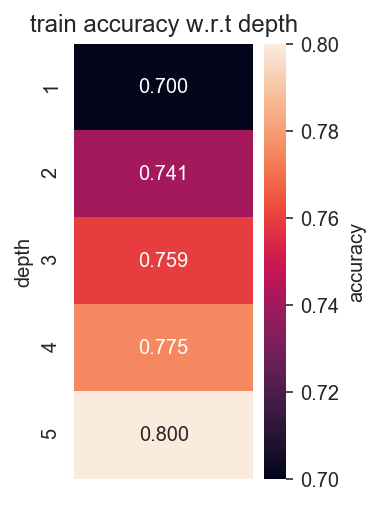

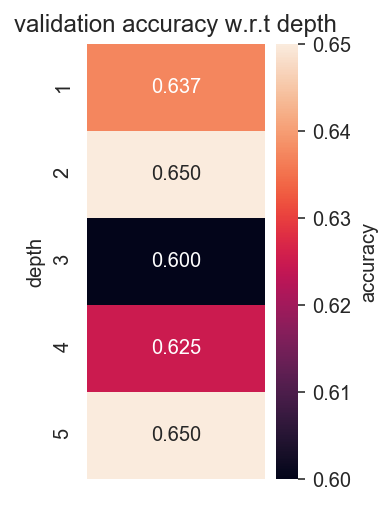

Case 50/50
0.6078431372549019
Training accuracy is: 0.3724099437148218
Validation accuracy is: 0.3724099437148218
Test accuracy is: 0.6078431372549019
Best accuracy in total is: 0.6078431372549019


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


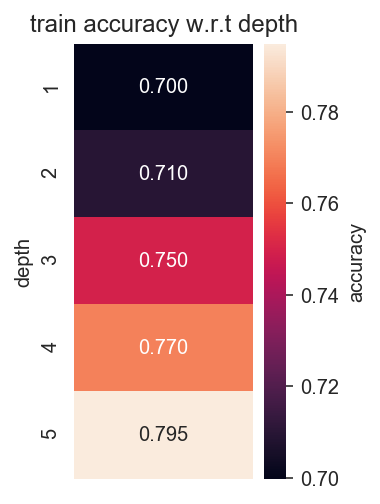

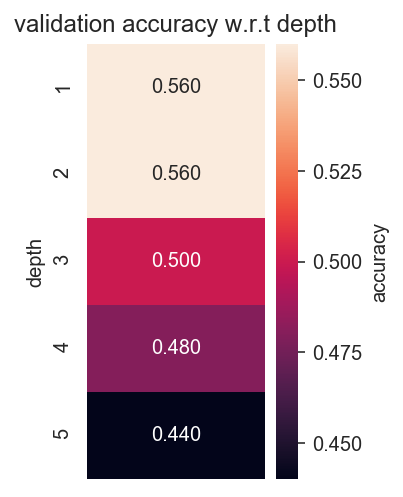

Case 80/20
0.5925925925925926
Training accuracy is: 0.4404509803921569
Validation accuracy is: 0.4404509803921569
Test accuracy is: 0.5925925925925926
Best accuracy in total is: 0.5925925925925926


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


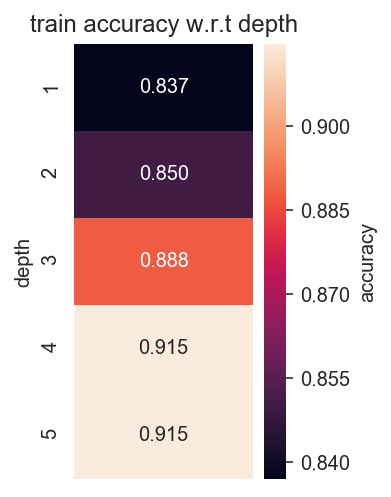

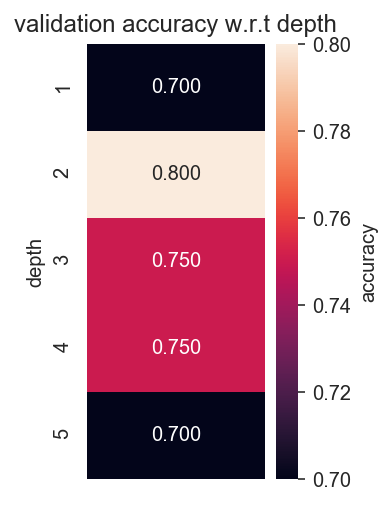

In [15]:
clf = tree.DecisionTreeClassifier()
D_list = [1,2,3,4,5]
param_dist = {
              "max_depth": D_list,
              "criterion": ["entropy"]
             }
clf = GridSearchCV(clf, param_dist, return_train_score = 'true',cv =5)

# 20/80
print("Case 20/80")
clf.fit(X_train_val, Y_train_val) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val, Y_train_val)
test_acc = clf.score(X_test, Y_test)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)

# 50/50
print("Case 50/50")
clf.fit(X_train_val2, Y_train_val2) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val2, Y_train_val2)
test_acc = clf.score(X_test2, Y_test2)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)

# 80/20
print("Case 80/20")
clf.fit(X_train_val3, Y_train_val3) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val3, Y_train_val3)
test_acc = clf.score(X_test3, Y_test3)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)




## 1.3 Using KNN 

Case 20/80
0.7619047619047619
Training accuracy is: 0.4404509803921569
Validation accuracy is: 0.4404509803921569
Test accuracy is: 0.7619047619047619
Best accuracy in total is: 0.7619047619047619


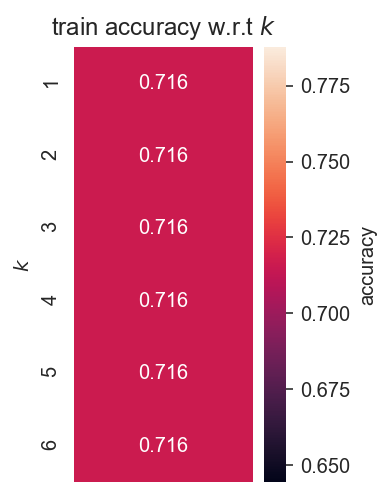

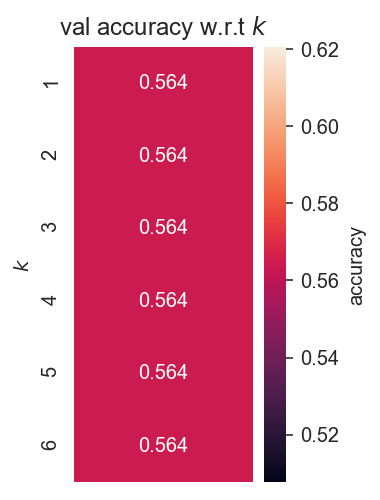

Case 50/50
0.5882352941176471
Training accuracy is: 0.4404509803921569
Validation accuracy is: 0.4404509803921569
Test accuracy is: 0.5882352941176471
Best accuracy in total is: 0.7843137254901961


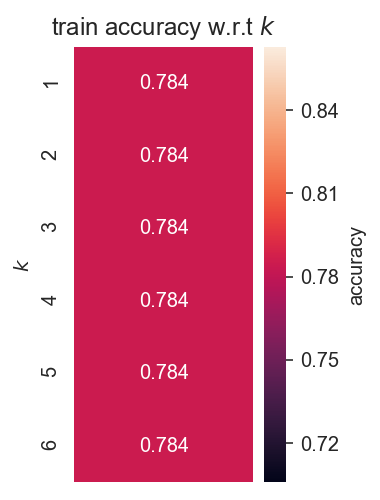

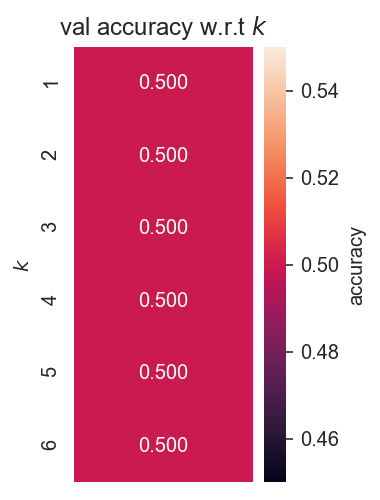

Case 80/20
0.5432098765432098
Training accuracy is: 0.4404509803921569
Validation accuracy is: 0.4404509803921569
Test accuracy is: 0.5432098765432098
Best accuracy in total is: 0.9047619047619048


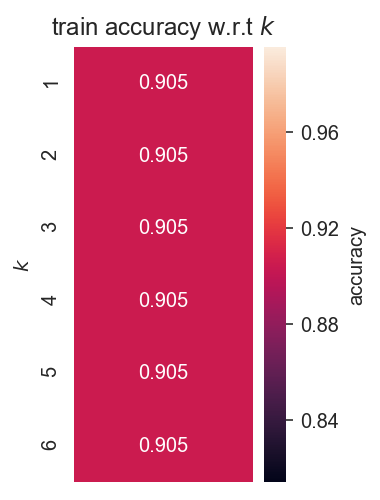

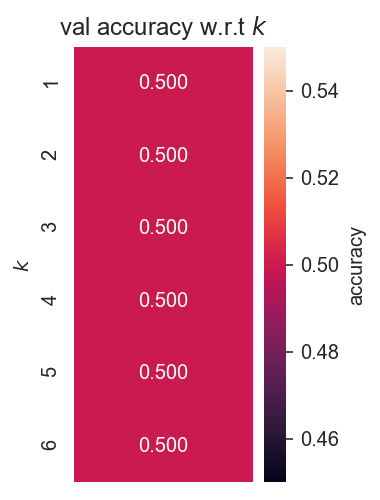

In [16]:
k_list = [1,2,3,4,5,6]

# 20/80
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val.values, Y_train_val.values, k_list, 3)
print("Case 20/80")
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val.values, Y_train_val.values)
test_arr = testclf.predict(X_test.values)
test_acc = (accuracy_score(Y_test, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)

# 50/50
print("Case 50/50")
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val2.values, Y_train_val2.values, k_list, 3)
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val2.values, Y_train_val2.values)
test_arr = testclf.predict(X_test2.values)
test_acc = (accuracy_score(Y_test2, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)


#80/20
print("Case 80/20")
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val3.values, Y_train_val3.values, k_list, 3)
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val3.values, Y_train_val3.values)
test_arr = testclf.predict(X_test3.values)
test_acc = (accuracy_score(Y_test3, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)





## Dataset 2: breast

## 2.1 Using Linear SVM

In [74]:
ds2 = pd.read_csv('poker-hand-testing.data',header =None,names=['s1','c1','s2','c2',
                                                               's3','c3','s4','c4',
                                                               's5','c5','poker-hand'])
ds2.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,poker-hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [75]:
ds2.dropna(inplace=True)
ds2.shape

(1000000, 11)

In [76]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for c in ds2:
    if(ds2[c].dtype != int):
        ds2[c] = lb.fit_transform(ds2[c])
ds2.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,poker-hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [77]:
ds2 = ds2.sample(frac=0.0003)
X = ds2[['s1','c1','s2','c2',
                                                               's3','c3','s4','c4',
                                                               's5','c5']]
Y = ds2['poker-hand']
print(X.shape,Y.shape)

(500, 10) (500,)


In [78]:
X_train_val = X.iloc[:int(0.8*len(X))]
X_test      = X.iloc[int(0.8*len(X)):]   
Y_train_val = Y.iloc[:int(0.8*len(Y))]
Y_test      = Y.iloc[int(0.8*len(Y)):]

X_train_val2 = X.iloc[:int(0.5*len(X))]
X_test2      = X.iloc[int(0.5*len(X)):]   
Y_train_val2 = Y.iloc[:int(0.5*len(Y))]
Y_test2      = Y.iloc[int(0.5*len(Y)):]

X_train_val3 = X.iloc[:int(0.2*len(X))]
X_test3    = X.iloc[int(0.2*len(X)):]   
Y_train_val3 = Y.iloc[:int(0.2*len(Y))]
Y_test3      = Y.iloc[int(0.2*len(Y)):]

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
print(X_train_val2.shape, X_test2.shape, Y_train_val2.shape, Y_test2.shape)
print(X_train_val3.shape, X_test3.shape, Y_train_val3.shape, Y_test3.shape)

(400, 10) (100, 10) (400,) (100,)
(250, 10) (250, 10) (250,) (250,)
(100, 10) (400, 10) (100,) (400,)


Case 20/80:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in versio

Training accuracy is: [0.5051186]
Validation accuracy is: [0.46516291]
Test accuracy is: 0.42
Best accuracy in total is: [0.5051186]


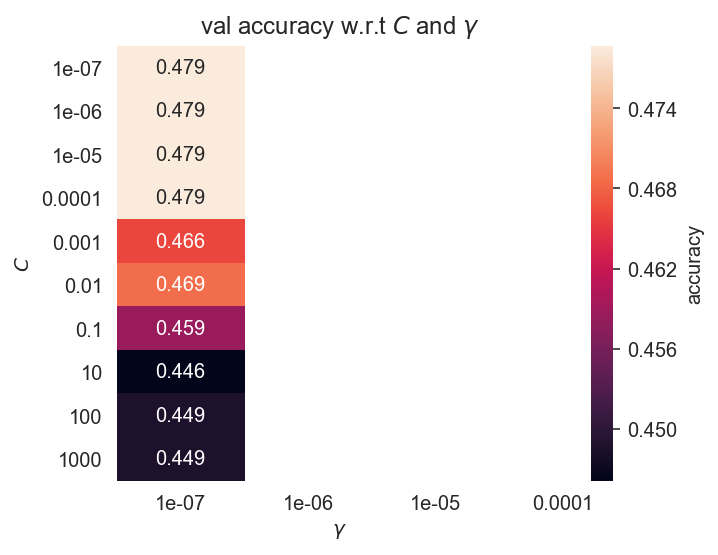

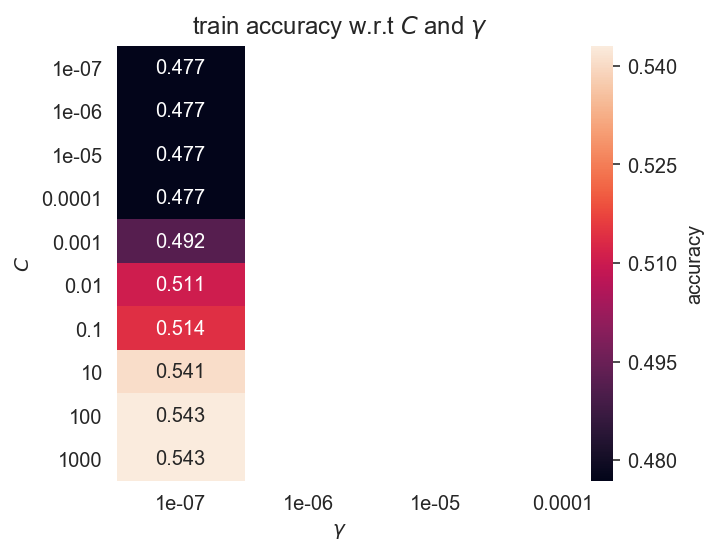

Case 50/50:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in versio

Training accuracy is: [0.51996008]
Validation accuracy is: [0.44176707]
Test accuracy is: 0.508
Best accuracy in total is: [0.51996008]


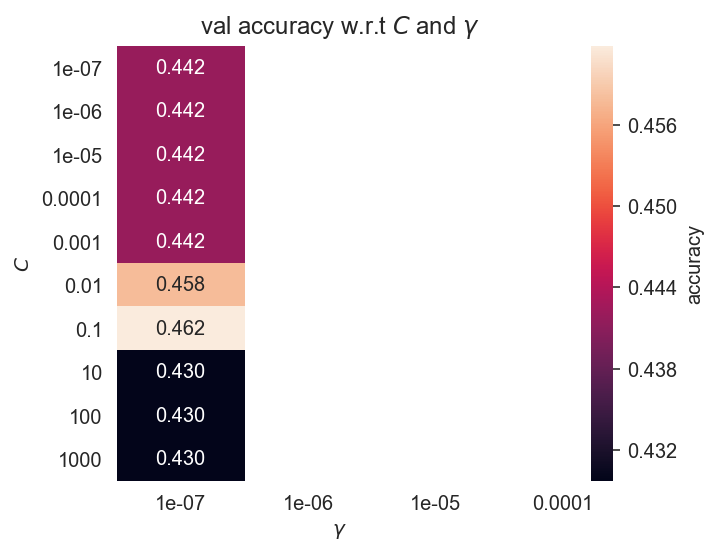

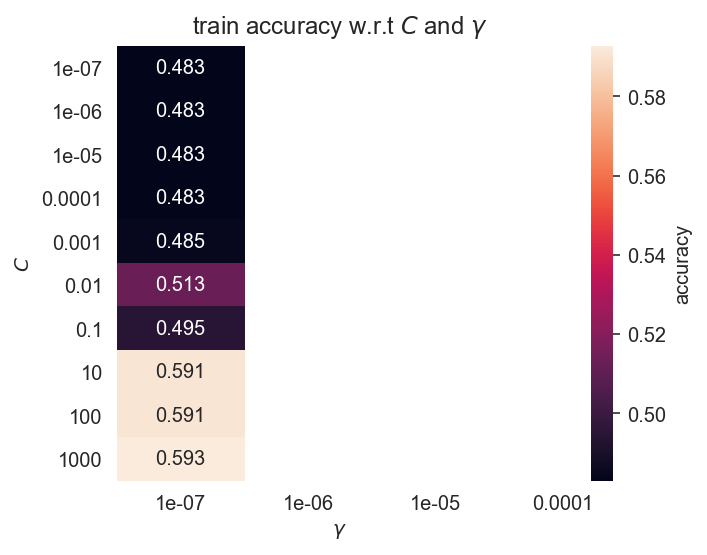

Case 80/20:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in versio

Training accuracy is: [0.637]
Validation accuracy is: [0.4]
Test accuracy is: 0.45
Best accuracy in total is: [0.637]


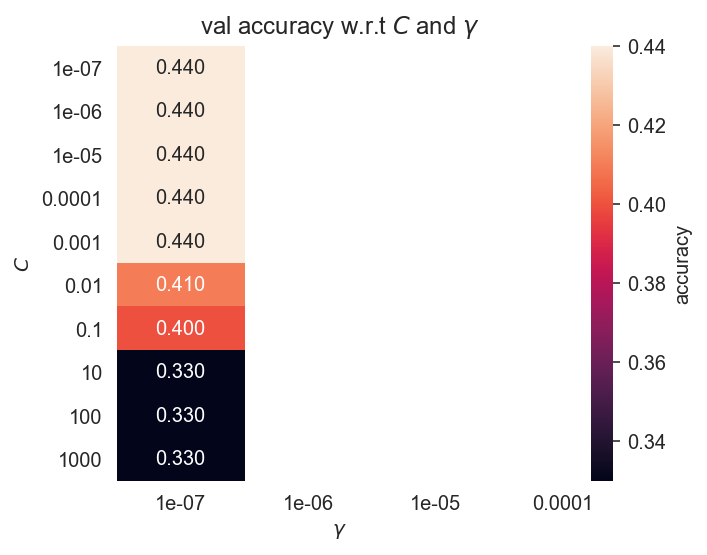

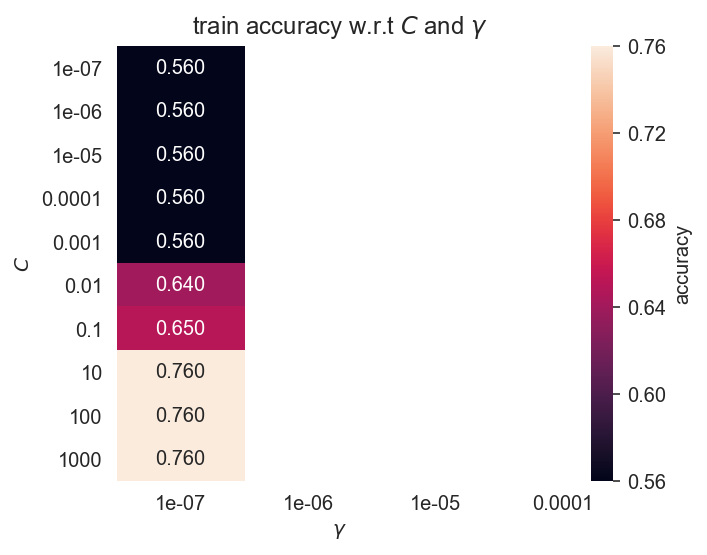

In [79]:
classifier = svm.SVC(kernel = 'rbf')
C_list  = [10**(-7),10**(-6), 10**-5,10**-4,10**-3, 10**-2,10**-1,10,100,1000] # Different C to tr
gamma_list = [10**-7, 10**-6, 10**-5,10**-4] # Different gamma to try.
param_grid = {'C':C_list}
GSearch = GridSearchCV(classifier,param_grid, return_train_score = 'true')
ones = np.ones(10)
ones= np.transpose(ones)

#20/80
print("Case 20/80:")
GSearch.fit(X_train_val, Y_train_val)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val.values, Y_train_val.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test, Y_test)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

#50/50
print("Case 50/50:")
GSearch.fit(X_train_val2, Y_train_val2)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val2.values, Y_train_val2.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test2, Y_test2)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

#80/20
print("Case 80/20:")
GSearch.fit(X_train_val3, Y_train_val3)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val3.values, Y_train_val3.values, C_list, gamma_list, 2)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test3, Y_test3)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)




## 2.2 Using Decision Tree

Case 20/80
0.44
Training accuracy is: 0.28888621014085897
Validation accuracy is: 0.28888621014085897
Test accuracy is: 0.44
Best accuracy in total is: 0.44


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from Tru

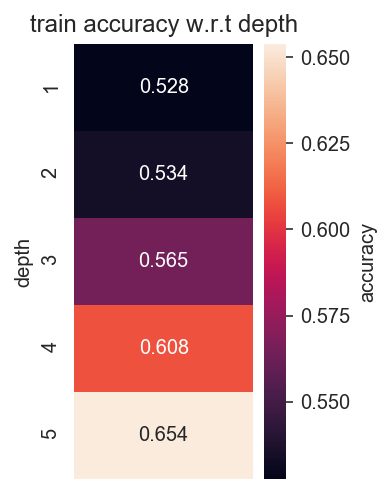

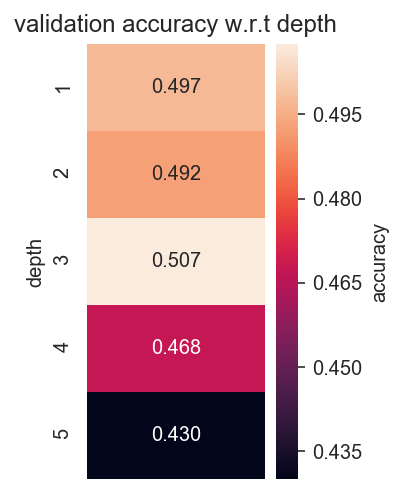

Case 50/50
0.476
Training accuracy is: 0.30641450536327386
Validation accuracy is: 0.30641450536327386
Test accuracy is: 0.476
Best accuracy in total is: 0.476


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from Tru

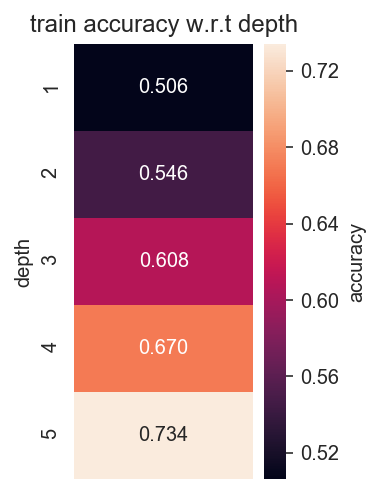

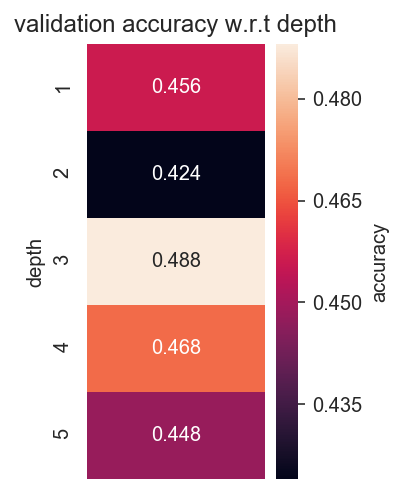

Case 80/20
0.4425
Training accuracy is: 0.34720208648375783
Validation accuracy is: 0.34720208648375783
Test accuracy is: 0.4425
Best accuracy in total is: 0.4425


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from Tru

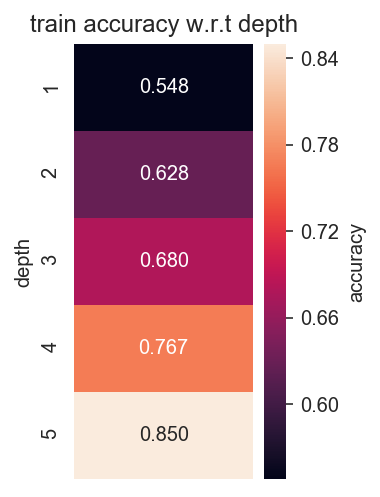

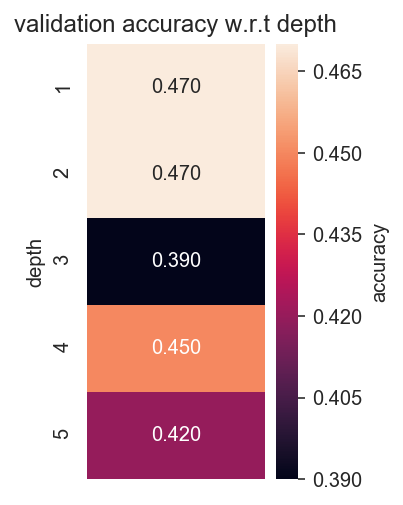

In [80]:
clf = tree.DecisionTreeClassifier()
D_list = [1,2,3,4,5]
param_dist = {
              "max_depth": D_list,
              "criterion": ["entropy"]
             }
clf = GridSearchCV(clf, param_dist, return_train_score = 'true',cv =5)

# 20/80
print("Case 20/80")
clf.fit(X_train_val, Y_train_val) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val, Y_train_val)
test_acc = clf.score(X_test, Y_test)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)

# 50/50
print("Case 50/50")
clf.fit(X_train_val2, Y_train_val2) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val2, Y_train_val2)
test_acc = clf.score(X_test2, Y_test2)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)

# 80/20
print("Case 80/20")
clf.fit(X_train_val3, Y_train_val3) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val3, Y_train_val3)
test_acc = clf.score(X_test3, Y_test3)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)





## Using KNN

Case 20/80
0.49
Training accuracy is: 0.34720208648375783
Validation accuracy is: 0.34720208648375783
Test accuracy is: 0.49
Best accuracy in total is: 1.0


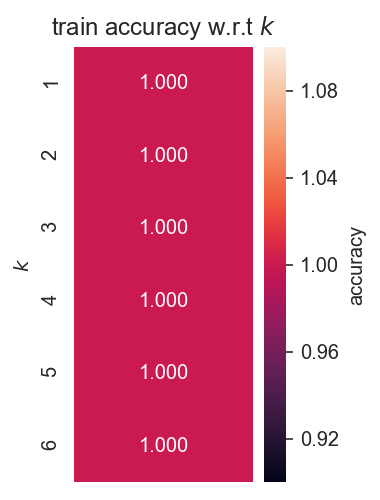

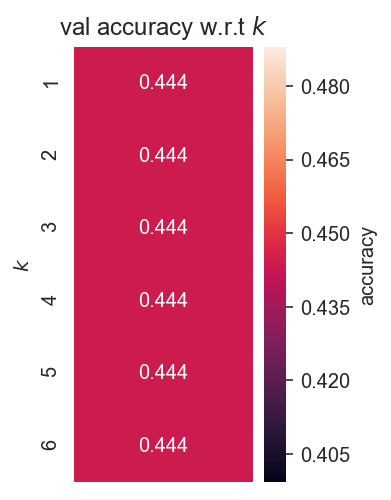

Case 50/50
0.488
Training accuracy is: 0.34720208648375783
Validation accuracy is: 0.34720208648375783
Test accuracy is: 0.488
Best accuracy in total is: 1.0


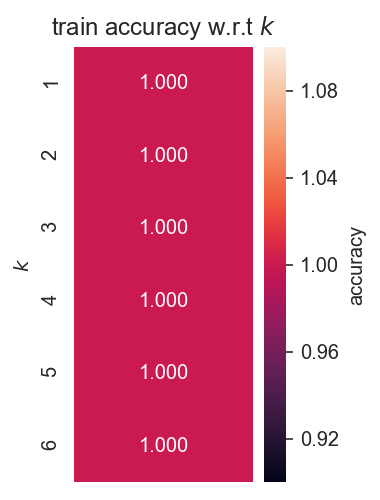

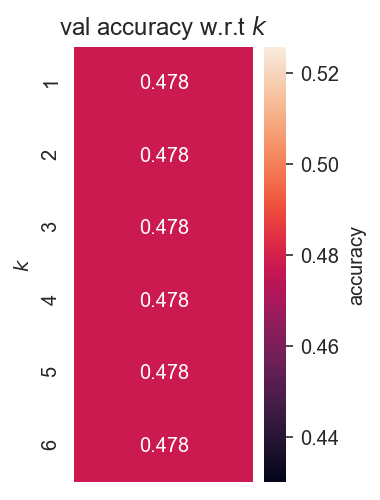

Case 80/20
0.485
Training accuracy is: 0.34720208648375783
Validation accuracy is: 0.34720208648375783
Test accuracy is: 0.485
Best accuracy in total is: 1.0


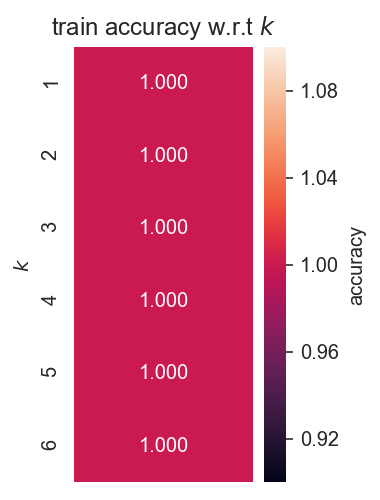

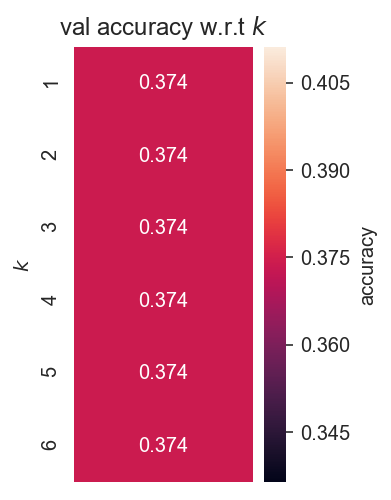

In [81]:
k_list = [1,2,3,4,5,6]

# 20/80
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val.values, Y_train_val.values, k_list, 3)
print("Case 20/80")
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val.values, Y_train_val.values)
test_arr = testclf.predict(X_test.values)
test_acc = (accuracy_score(Y_test, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)

# 50/50
print("Case 50/50")
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val2.values, Y_train_val2.values, k_list, 3)
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val2.values, Y_train_val2.values)
test_arr = testclf.predict(X_test2.values)
test_acc = (accuracy_score(Y_test2, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)


#80/20
print("Case 80/20")
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val3.values, Y_train_val3.values, k_list, 3)
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val3.values, Y_train_val3.values)
test_arr = testclf.predict(X_test3.values)
test_acc = (accuracy_score(Y_test3, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)




## Dataset 3: Abalone

## 3.1 Using Linear SVM

In [82]:
ds3 = pd.read_csv('abalone.data',header = None,
                  names=['sex','length',
                        'diameter','height','whole weight',
                        'shucked weight','viscera weight',
                        'shell weight','rings'])
ds3.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [83]:
ds3.dropna(inplace=True)
ds3.shape

(4177, 9)

In [84]:
X_and_Y = ds3.sample(frac = 0.05)
X = X_and_Y[['length',
        'diameter','height','whole weight',
         'shucked weight','viscera weight',
        'shell weight']]
Y = X_and_Y['rings']
print(X.shape,Y.shape)

(209, 7) (209,)


In [85]:
X_train_val = X.iloc[:int(0.8*len(X))]
X_test      = X.iloc[int(0.8*len(X)):]   
Y_train_val = Y.iloc[:int(0.8*len(Y))]
Y_test      = Y.iloc[int(0.8*len(Y)):]

X_train_val2 = X.iloc[:int(0.5*len(X))]
X_test2      = X.iloc[int(0.5*len(X)):]   
Y_train_val2 = Y.iloc[:int(0.5*len(Y))]
Y_test2      = Y.iloc[int(0.5*len(Y)):]

X_train_val3 = X.iloc[:int(0.2*len(X))]
X_test3    = X.iloc[int(0.2*len(X)):]   
Y_train_val3 = Y.iloc[:int(0.2*len(Y))]
Y_test3      = Y.iloc[int(0.2*len(Y)):]

print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)
print(X_train_val2.shape, X_test2.shape, Y_train_val2.shape, Y_test2.shape)
print(X_train_val3.shape, X_test3.shape, Y_train_val3.shape, Y_test3.shape)

(167, 7) (42, 7) (167,) (42,)
(104, 7) (105, 7) (104,) (105,)
(41, 7) (168, 7) (41,) (168,)


Case 20/80:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in versio

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training accuracy is: [0.25565476]
Validation accuracy is: [0.21393939]
Test accuracy is: 0.19047619047619047
Best accuracy in total is: [0.25565476]


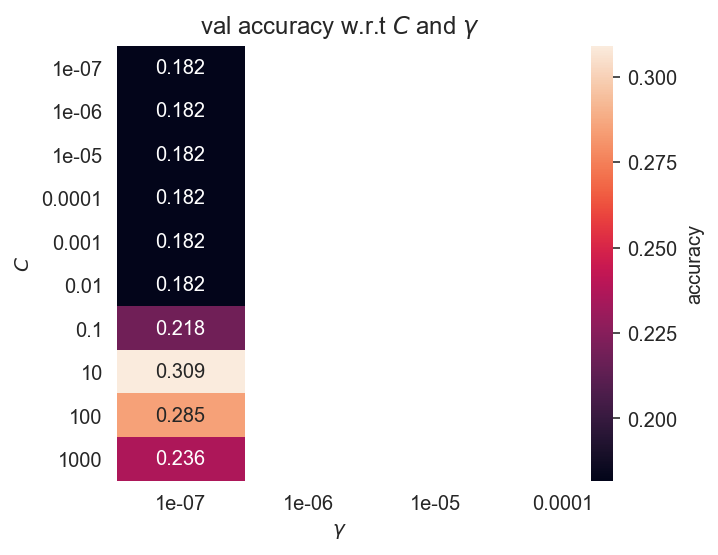

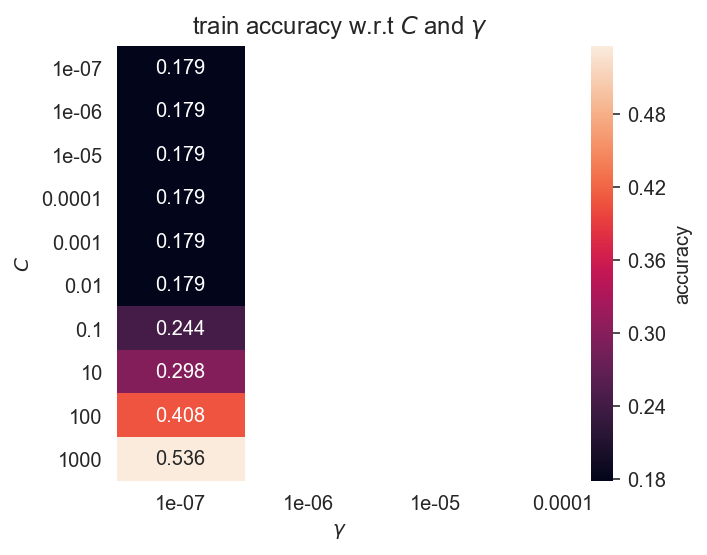

Case 50/50:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in versio

Training accuracy is: [0.2747619]
Validation accuracy is: [0.16176471]
Test accuracy is: 0.23809523809523808
Best accuracy in total is: [0.2747619]


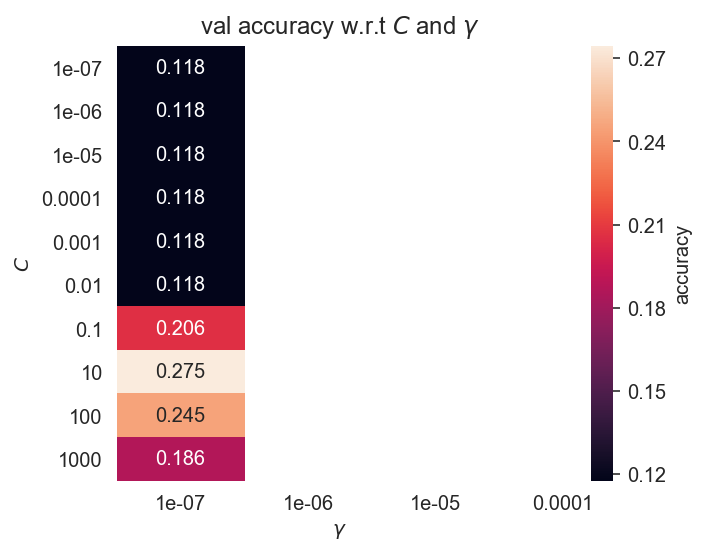

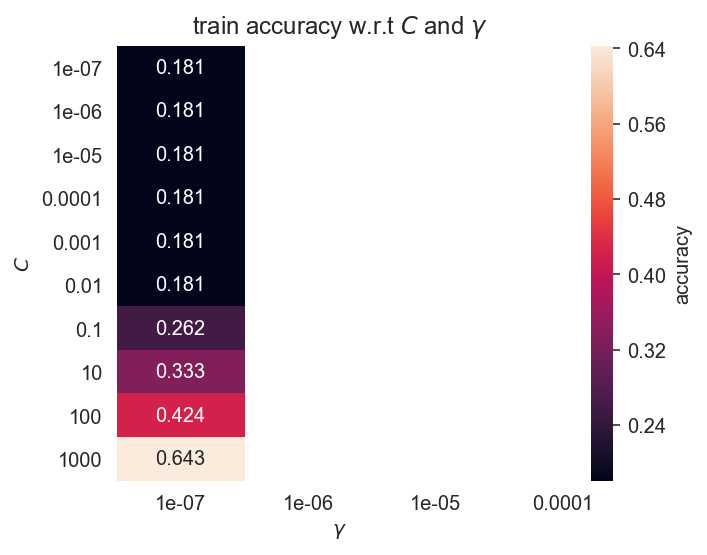

Case 80/20:


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in versio

Training accuracy is: [0.37857143]
Validation accuracy is: [0.13076923]
Test accuracy is: 0.24404761904761904
Best accuracy in total is: [0.37857143]


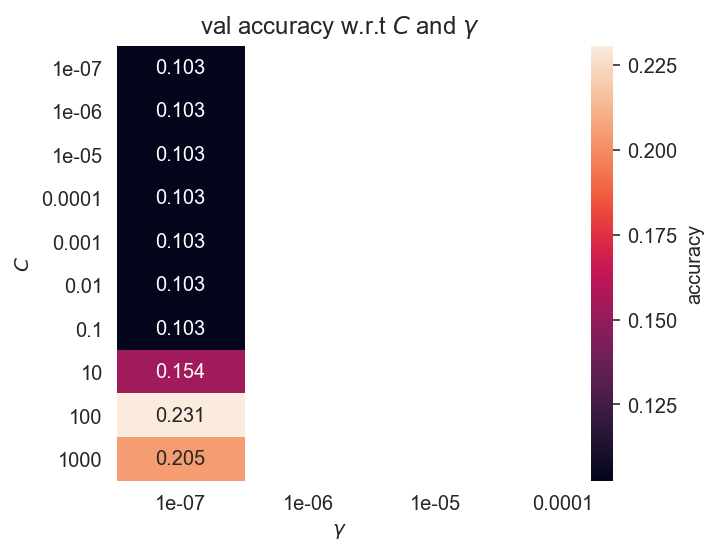

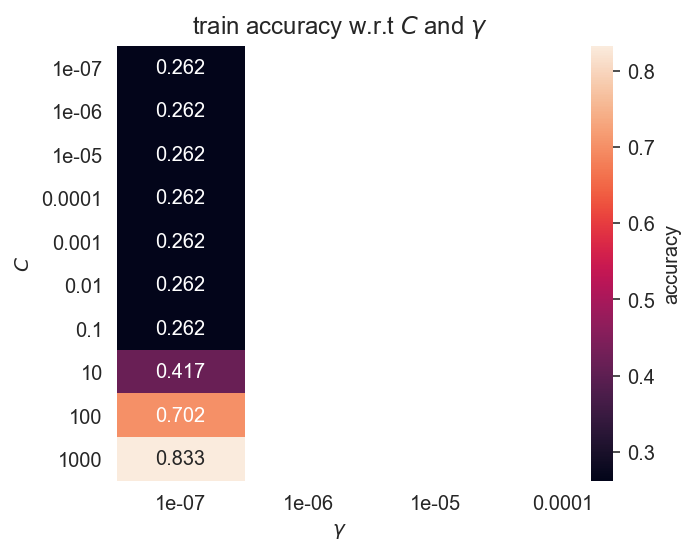

In [86]:
classifier = svm.SVC(kernel = 'rbf')
C_list  = [10**(-7),10**(-6), 10**-5,10**-4,10**-3, 10**-2,10**-1,10,100,1000] # Different C to tr
gamma_list = [10**-7, 10**-6, 10**-5,10**-4] # Different gamma to try.
param_grid = {'C':C_list}
GSearch = GridSearchCV(classifier,param_grid, return_train_score = 'true')
ones = np.ones(10)
ones= np.transpose(ones)

#20/80
print("Case 20/80:")
GSearch.fit(X_train_val, Y_train_val)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val.values, Y_train_val.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test, Y_test)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

#50/50
print("Case 50/50:")
GSearch.fit(X_train_val2, Y_train_val2)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val2.values, Y_train_val2.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test2, Y_test2)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)

#80/20
print("Case 80/20:")
GSearch.fit(X_train_val3, Y_train_val3)  
val_acc_matrix, train_acc_matrix = \
    simple_GridSearchCV_fit_svm(X_train_val3.values, Y_train_val3.values, C_list, gamma_list, 3)
train_acc = np.dot(ones,train_acc_matrix)/10
val_acc = np.dot(ones,val_acc_matrix)/10
test_acc = GSearch.score(X_test3, Y_test3)
result = max(train_acc,val_acc,test_acc)
print("Training accuracy is:",train_acc)
print("Validation accuracy is:",val_acc)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_RBF(val_acc_matrix, 'val accuracy', gamma_list, C_list)
draw_heatmap_RBF(train_acc_matrix, 'train accuracy', gamma_list, C_list)



## 3.2 Using Decision Tree

Case 20/80
0.14285714285714285
Training accuracy is: 0.19842507377729113
Validation accuracy is: 0.19842507377729113
Test accuracy is: 0.14285714285714285
Best accuracy in total is: 0.19842507377729113


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from Tru

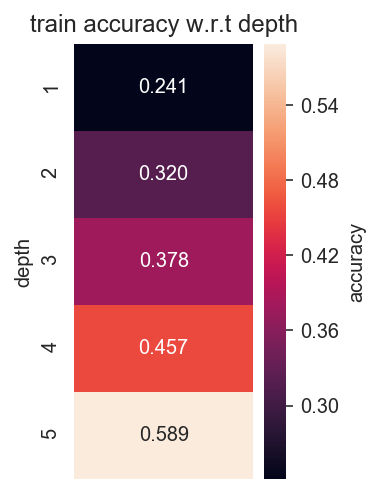

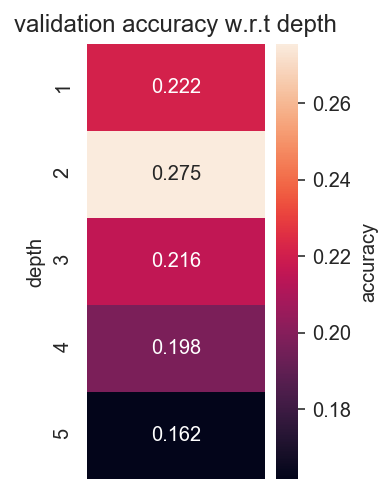

Case 50/50
0.17142857142857143
Training accuracy is: 0.22839233483411564
Validation accuracy is: 0.22839233483411564
Test accuracy is: 0.17142857142857143
Best accuracy in total is: 0.22839233483411564


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from Tru

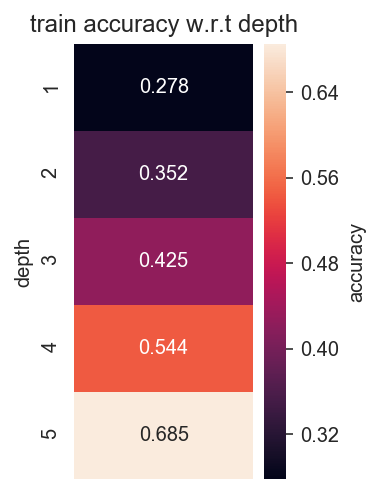

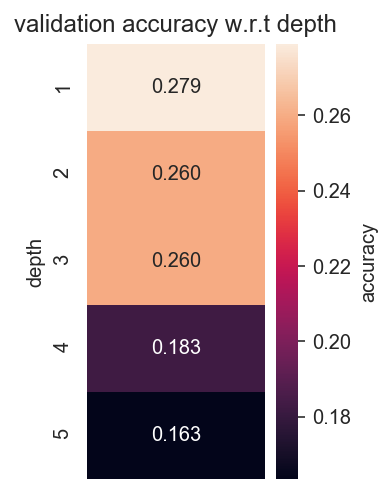

Case 80/20
0.20833333333333334
Training accuracy is: 0.3103095452155761
Validation accuracy is: 0.3103095452155761
Test accuracy is: 0.20833333333333334
Best accuracy in total is: 0.3103095452155761


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from Tru

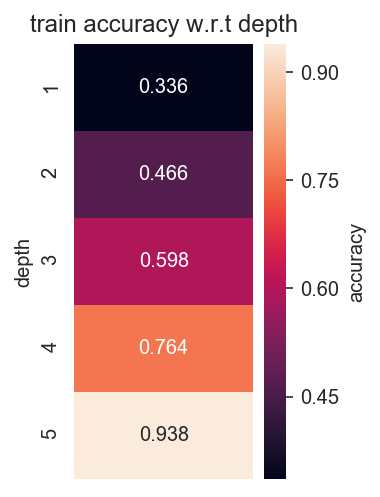

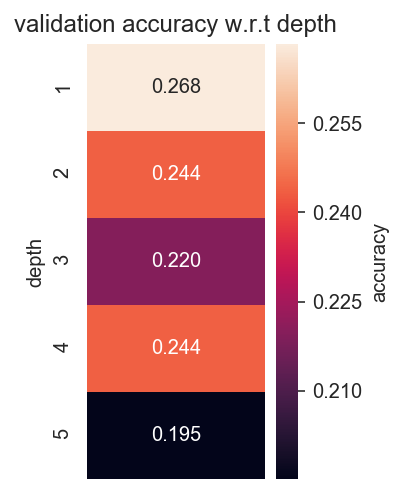

In [87]:
clf = tree.DecisionTreeClassifier()
D_list = [1,2,3,4,5]
param_dist = {
              "max_depth": D_list,
              "criterion": ["entropy"]
             }
clf = GridSearchCV(clf, param_dist, return_train_score = 'true',cv =5)

# 20/80
print("Case 20/80")
clf.fit(X_train_val, Y_train_val) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val, Y_train_val)
test_acc = clf.score(X_test, Y_test)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)

# 50/50
print("Case 50/50")
clf.fit(X_train_val2, Y_train_val2) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val2, Y_train_val2)
test_acc = clf.score(X_test2, Y_test2)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)

# 80/20
print("Case 80/20")
clf.fit(X_train_val3, Y_train_val3) 
ones = np.ones(5)
ones= np.transpose(ones)
train_acc = clf.cv_results_['mean_train_score']
train_acc1 = np.dot(ones,train_acc)/10
val_acc = clf.cv_results_['mean_test_score']
val_acc1 = np.dot(ones,train_acc)/10

# 5) Use the optimal D to calculate the test accuracy.
classifiers = tree.DecisionTreeClassifier()
param_dist = {
              "max_depth": [clf.best_params_['max_depth']],
              "criterion": ["entropy"]
             }
testclf = GridSearchCV(classifiers, param_dist, return_train_score = 'true',cv =5)
testclf.fit(X_train_val3, Y_train_val3)
test_acc = clf.score(X_test3, Y_test3)
print(test_acc)
result = max(train_acc1,val_acc1,test_acc)
print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_linear(train_acc.reshape(-1,1), 'train accuracy', D_list)
draw_heatmap_linear(val_acc.reshape(-1,1), 'validation accuracy', D_list)





## Using KNN

Case 20/80
0.11904761904761904
Training accuracy is: 0.3103095452155761
Validation accuracy is: 0.3103095452155761
Test accuracy is: 0.11904761904761904
Best accuracy in total is: 1.0


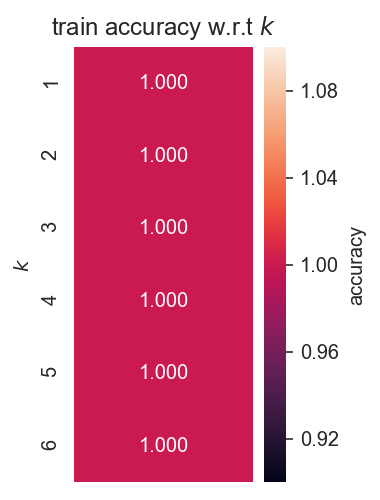

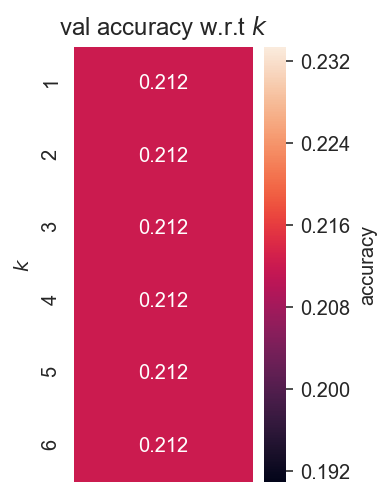

Case 50/50
0.18095238095238095
Training accuracy is: 0.3103095452155761
Validation accuracy is: 0.3103095452155761
Test accuracy is: 0.18095238095238095
Best accuracy in total is: 1.0


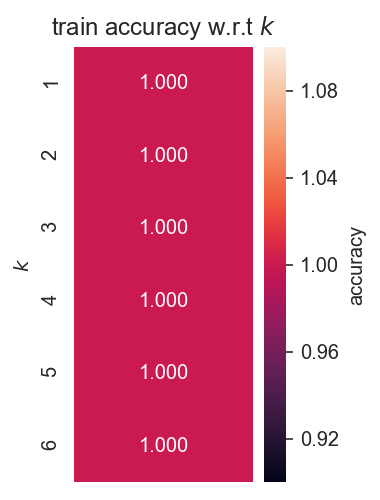

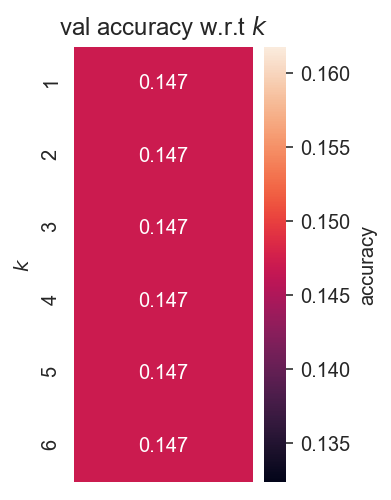

Case 80/20
0.19642857142857142
Training accuracy is: 0.3103095452155761
Validation accuracy is: 0.3103095452155761
Test accuracy is: 0.19642857142857142
Best accuracy in total is: 1.0


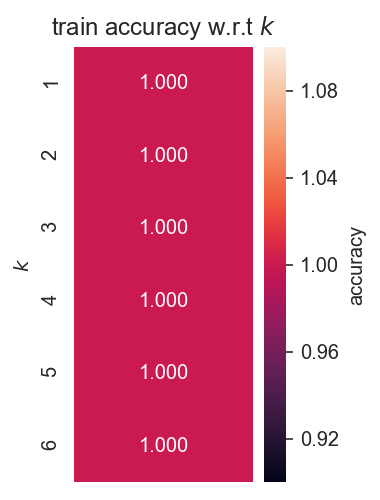

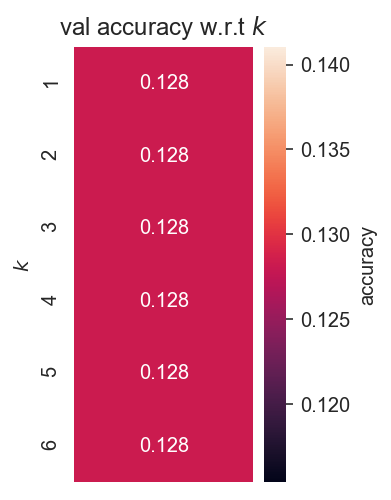

In [88]:
k_list = [1,2,3,4,5,6]

# 20/80
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val.values, Y_train_val.values, k_list, 3)
print("Case 20/80")
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val.values, Y_train_val.values)
test_arr = testclf.predict(X_test.values)
test_acc = (accuracy_score(Y_test, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)

# 50/50
print("Case 50/50")
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val2.values, Y_train_val2.values, k_list, 3)
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val2.values, Y_train_val2.values)
test_arr = testclf.predict(X_test2.values)
test_acc = (accuracy_score(Y_test2, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)


#80/20
print("Case 80/20")
val_acc_array, train_acc_array = \
    simple_GridSearchCV_fit_knn(X_train_val3.values, Y_train_val3.values, k_list, 3)
train_acc = sum(train_acc_array)/6
val_acc = sum(val_acc_array)/6

testclf = simple_KNeighborsClassifier(1)
testclf.fit(X_train_val3.values, Y_train_val3.values)
test_arr = testclf.predict(X_test3.values)
test_acc = (accuracy_score(Y_test3, test_arr))
print(test_acc)
result = max(train_acc,val_acc,test_acc)

print("Training accuracy is:",train_acc1)
print("Validation accuracy is:",val_acc1)
print("Test accuracy is:",test_acc)
print("Best accuracy in total is:",result)
draw_heatmap_knn(train_acc_array.reshape(-1,1), 'train accuracy', k_list)
draw_heatmap_knn(val_acc_array.reshape(-1,1), 'val accuracy', k_list)


